In [1]:
#imprt Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import scipy.stats as st 

from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [3]:
#import Data
data_train=pd.read_csv('../../data/Car_train-data.csv')



In [4]:
#Data Look
data_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


<b> <p style="color:#289e00">Data Clean Part </p> </b>

In [217]:
data_train=data_train.iloc[:,1:]

In [218]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [219]:
#selection of important columns
data_train_c=data_train.iloc[:,[0,1,2,3,4,5,7,8,9,10]]

In [220]:
#firstly we need to Clean the data for This Dataframe
data_train_c.replace({' ':np.nan,'null':np.nan},inplace=True)
data_train_c=data_train_c.dropna()

<b> <p style="color:red">Warning: Again we need to check Every column in does not exists any  unknown things i.e "null" ,'None','NA' and 'none' etc. Because dropna Can't remove string null like 'null'. if you are not remove this thing then  error will be occur ahead in  data maniplution </p> </b>

In [221]:
# How To check Above Instruction
for i in data_train_c.columns:
     print(data_train_c[i].unique()) #unique value for each column

['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Volkswagen Polo IPL II 1.2 Petrol Highline'
 'Tata Bolt Revotron XT' 'Mahindra Xylo D4 BSIV']
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
[2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998]
[72000 41000 46000 ... 45004 70602 27365]
['CNG' 'Diesel' 'Petrol' 'LPG']
['Manual' 'Automatic']
['26.6 km/kg' '19.67 kmpl' '18.2 kmpl' '20.77 kmpl' '15.2 kmpl'
 '21.1 km/kg' '23.08 kmpl' '11.36 kmpl' '20.54 kmpl' '22.3 kmpl'
 '21.56 kmpl' '16.8 kmpl' '25.2 kmpl' '12.7 kmpl' '0.0 kmpl' '13.5 kmpl'
 '25.8 kmpl' '28.4 kmpl' '20.45 kmpl' '14.84 kmpl' '22.69 kmpl'
 '23.65 kmpl' '13.53 kmpl' '18.5 kmpl' '14.4 kmpl' '20.92 kmpl'
 '17.5 kmpl' '12.8 kmpl' '19.01 kmpl' '14.53 kmpl' '11.18 kmpl'
 '12.4 kmpl' '16.09 kmpl' '14.0 kmpl' '24.3 kmpl' '18.15 kmpl'
 '11.74 kmpl' '22.07 kmpl' '19.7 kmpl' '25.4

In [222]:
# Here you can see 'null bhp' occur so it's replace by np.nan and then drop this raw
data_train_c.replace({'null bhp':np.nan,'null km/kg':np.nan,'null CC':np.nan},inplace=True)
data_train_c=data_train_c.dropna()


In [223]:
data_train_c.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,26.6 km/kg,998 CC,58.16 bhp,5.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,19.67 kmpl,1582 CC,126.2 bhp,5.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,18.2 kmpl,1199 CC,88.7 bhp,5.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,20.77 kmpl,1248 CC,88.76 bhp,7.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,15.2 kmpl,1968 CC,140.8 bhp,5.0


<b> <p style="color:#289e00">Data Maniplution Part </p> </b>

In [224]:
#remove extenation  km/kg ,bhp, CC from below column and convert string into float Value
l1=['Mileage','Engine','Power']
for i in l1:
    data_train_c[i]=data_train_c[i].str.split(" ").apply(lambda x:x[0])
    data_train_c[i] = data_train_c[i].str.strip()
    data_train_c[i] = data_train_c[i].astype(float)


In [225]:
#Data Look 
data_train_c.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,26.60,998.0,58.16,5.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,19.67,1582.0,126.20,5.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,18.20,1199.0,88.70,5.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,20.77,1248.0,88.76,7.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,15.20,1968.0,140.80,5.0


In [226]:
data_train_c.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [227]:
#Fule_Type column is Categorical data so we need to convert into numeric order for Better Price prediction 
data_train_c.Fuel_Type.replace({'Petrol':1,'CNG':3,'Diesel':2,'LPG':4},inplace=True)

In [228]:
data_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   int64  
 5   Transmission       5872 non-null   object 
 6   Mileage            5872 non-null   float64
 7   Engine             5872 non-null   float64
 8   Power              5872 non-null   float64
 9   Seats              5872 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 504.6+ KB


In [229]:
data_train_c.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [230]:
# Above thing apply in Transmission column
data_train_c.Transmission.replace({'Manual':1,'Automatic':2},inplace=True)

In [231]:
data_train_c.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,3,1,26.60,998.0,58.16,5.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,2,1,19.67,1582.0,126.20,5.0
2,Honda Jazz V,Chennai,2011,46000,1,1,18.20,1199.0,88.70,5.0
3,Maruti Ertiga VDI,Chennai,2012,87000,2,1,20.77,1248.0,88.76,7.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,2,2,15.20,1968.0,140.80,5.0


In [232]:
data_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   int64  
 5   Transmission       5872 non-null   int64  
 6   Mileage            5872 non-null   float64
 7   Engine             5872 non-null   float64
 8   Power              5872 non-null   float64
 9   Seats              5872 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 504.6+ KB


In [233]:
'''Before we apply first step  look our  data range  menas  we need to check range  of column  values 
so we will be visualize easily our plot with Price column value'''
for i in data_train_c.columns:
    print(i)
    print(data_train_c[i].describe())

Name
count                       5872
unique                      1811
top       Mahindra XUV500 W8 2WD
freq                          49
Name: Name, dtype: object
Location
count       5872
unique        11
top       Mumbai
freq         775
Name: Location, dtype: object
Year
count    5872.000000
mean     2013.477691
std         3.164568
min      1998.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64
Kilometers_Driven
count    5.872000e+03
mean     5.831700e+04
std      9.216941e+04
min      1.710000e+02
25%      3.342250e+04
50%      5.260900e+04
75%      7.240275e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64
Fuel_Type
count    5872.000000
mean        1.560627
std         0.524712
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Fuel_Type, dtype: float64
Transmission
count    5872.000000
mean        1.289850
std         0.453731
min       

In [234]:
''' Here 'Kilometers_Driven' in High value data so we need to convert high value to lower value
therfore we easily compare with  price value '''
data_train_c['KM_Drlog_form'] = np.log(data_train_c['Kilometers_Driven'])

data_train_c['KM_Drlog_form'].dropna()

0       11.184421
1       10.621327
2       10.736397
3       11.373663
4       10.613246
          ...    
6014    10.217020
6015    11.512925
6016    10.915088
6017    10.736397
6018    10.757903
Name: KM_Drlog_form, Length: 5872, dtype: float64

In [235]:
data_train_c

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,KM_Drlog_form
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,3,1,26.60,998.0,58.16,5.0,11.184421
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,2,1,19.67,1582.0,126.20,5.0,10.621327
2,Honda Jazz V,Chennai,2011,46000,1,1,18.20,1199.0,88.70,5.0,10.736397
3,Maruti Ertiga VDI,Chennai,2012,87000,2,1,20.77,1248.0,88.76,7.0,11.373663
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,2,2,15.20,1968.0,140.80,5.0,10.613246
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,2,1,28.40,1248.0,74.00,5.0,10.217020
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,2,1,24.40,1120.0,71.00,5.0,11.512925
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,2,1,14.00,2498.0,112.00,8.0,10.915088
6017,Maruti Wagon R VXI,Kolkata,2013,46000,1,1,18.90,998.0,67.10,5.0,10.736397


In [236]:
data_train_c1=data_train_c.copy()

In [237]:
data_train_c1['Price']=data_train['Price']

In [238]:
data_train_c1['Company']=data_train_c1['Name'].str.split(" ").apply(lambda x: x[0])

In [239]:
data_train_c1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,KM_Drlog_form,Price,Company
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,3,1,26.60,998.0,58.16,5.0,11.184421,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,2,1,19.67,1582.0,126.20,5.0,10.621327,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,1,1,18.20,1199.0,88.70,5.0,10.736397,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,2,1,20.77,1248.0,88.76,7.0,11.373663,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,2,2,15.20,1968.0,140.80,5.0,10.613246,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,2,1,28.40,1248.0,74.00,5.0,10.217020,4.75,Maruti
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,2,1,24.40,1120.0,71.00,5.0,11.512925,4.00,Hyundai
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,2,1,14.00,2498.0,112.00,8.0,10.915088,2.90,Mahindra
6017,Maruti Wagon R VXI,Kolkata,2013,46000,1,1,18.90,998.0,67.10,5.0,10.736397,2.65,Maruti


In [240]:
data_train_c1["Company"] = pd.Categorical(data_train_c1["Company"])
data_train_c1['Company_label']=data_train_c1.Company.cat.codes

,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,...,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
6014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6018,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [245]:
co_dict=data_train_c1.Company.value_counts().sort_values(ascending=False).to_dict()
co_dict

{'Maruti': 1175,
 'Hyundai': 1058,
 'Honda': 600,
 'Toyota': 394,
 'Mercedes-Benz': 316,
 'Volkswagen': 314,
 'Ford': 294,
 'Mahindra': 268,
 'BMW': 262,
 'Audi': 235,
 'Tata': 183,
 'Skoda': 172,
 'Renault': 145,
 'Chevrolet': 120,
 'Nissan': 89,
 'Land': 57,
 'Jaguar': 40,
 'Mitsubishi': 27,
 'Mini': 26,
 'Fiat': 23,
 'Volvo': 21,
 'Porsche': 16,
 'Jeep': 15,
 'Datsun': 13,
 'Force': 3,
 'ISUZU': 2,
 'Lamborghini': 1,
 'Bentley': 1,
 'Isuzu': 1,
 'Ambassador': 1}

In [397]:
for label in list(co_dict.keys())[:10]:
    data_train_c1[label]=np.where(data_train_c1['Company'],1,0)
data_train_c1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,...,Maruti,Hyundai,Honda,Toyota,Mercedes-Benz,Volkswagen,Ford,Mahindra,BMW,Audi
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,3,1,26.60,998.0,58.16,5.0,...,1,1,1,1,1,1,1,1,1,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,2,1,19.67,1582.0,126.20,5.0,...,1,1,1,1,1,1,1,1,1,1
2,Honda Jazz V,Chennai,2011,46000,1,1,18.20,1199.0,88.70,5.0,...,1,1,1,1,1,1,1,1,1,1
3,Maruti Ertiga VDI,Chennai,2012,87000,2,1,20.77,1248.0,88.76,7.0,...,1,1,1,1,1,1,1,1,1,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,2,2,15.20,1968.0,140.80,5.0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,2,1,28.40,1248.0,74.00,5.0,...,1,1,1,1,1,1,1,1,1,1
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,2,1,24.40,1120.0,71.00,5.0,...,1,1,1,1,1,1,1,1,1,1
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,2,1,14.00,2498.0,112.00,8.0,...,1,1,1,1,1,1,1,1,1,1
6017,Maruti Wagon R VXI,Kolkata,2013,46000,1,1,18.90,998.0,67.10,5.0,...,1,1,1,1,1,1,1,1,1,1


<i><big> <p style="color:#9e009e"> Linear Regression</big> </i> </p>
<br>
<b> Our Target Variable is Price </b>

<b> step1: we need to find relationship between Independent variable(IV) vs Dependent variable(DI) </b>

In [165]:
%matplotlib inline

<b> Now we will see our relationship between IV and DI </b>

In [166]:
# #Scatter plot
# g = sns.PairGrid(data_train_c1,

#                  x_vars=data_train_c1.columns,

#                  y_vars=['Price'])
# g = g.map(plt.scatter)

In [398]:
data_train_c1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,...,Maruti,Hyundai,Honda,Toyota,Mercedes-Benz,Volkswagen,Ford,Mahindra,BMW,Audi
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,3,1,26.60,998.0,58.16,5.0,...,1,1,1,1,1,1,1,1,1,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,2,1,19.67,1582.0,126.20,5.0,...,1,1,1,1,1,1,1,1,1,1
2,Honda Jazz V,Chennai,2011,46000,1,1,18.20,1199.0,88.70,5.0,...,1,1,1,1,1,1,1,1,1,1
3,Maruti Ertiga VDI,Chennai,2012,87000,2,1,20.77,1248.0,88.76,7.0,...,1,1,1,1,1,1,1,1,1,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,2,2,15.20,1968.0,140.80,5.0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,2,1,28.40,1248.0,74.00,5.0,...,1,1,1,1,1,1,1,1,1,1
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,2,1,24.40,1120.0,71.00,5.0,...,1,1,1,1,1,1,1,1,1,1
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,2,1,14.00,2498.0,112.00,8.0,...,1,1,1,1,1,1,1,1,1,1
6017,Maruti Wagon R VXI,Kolkata,2013,46000,1,1,18.90,998.0,67.10,5.0,...,1,1,1,1,1,1,1,1,1,1


In [401]:
#remove one outlier  because this outlier distract our model we can see this thing our above sctter plot

data_train_c1.loc[data_train_c1['Kilometers_Driven']!=data_train_c1['Kilometers_Driven'].max()]
data_train_c1['Kilometers_Driven'].dropna()
data_train_c1['KM_Drlog_form'] = np.log(data_train_c1['Kilometers_Driven'])


In [402]:
data_train_c1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,...,Maruti,Hyundai,Honda,Toyota,Mercedes-Benz,Volkswagen,Ford,Mahindra,BMW,Audi
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,3,1,26.60,998.0,58.16,5.0,...,1,1,1,1,1,1,1,1,1,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,2,1,19.67,1582.0,126.20,5.0,...,1,1,1,1,1,1,1,1,1,1
2,Honda Jazz V,Chennai,2011,46000,1,1,18.20,1199.0,88.70,5.0,...,1,1,1,1,1,1,1,1,1,1
3,Maruti Ertiga VDI,Chennai,2012,87000,2,1,20.77,1248.0,88.76,7.0,...,1,1,1,1,1,1,1,1,1,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,2,2,15.20,1968.0,140.80,5.0,...,1,1,1,1,1,1,1,1,1,1


In [403]:
data_train_c1.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Mileage', 'Engine', 'Power', 'Seats', 'KM_Drlog_form',
       'Price', 'Company', 'Company_label', 'Maruti', 'Hyundai', 'Honda',
       'Toyota', 'Mercedes-Benz', 'Volkswagen', 'Ford', 'Mahindra', 'BMW',
       'Audi'],
      dtype='object')

In [407]:
#Heatmap relationship all columns
# sns.heatmap(data=data_train_c1.iloc[:,[]].corr(), annot = True)

ValueError: zero-size array to reduction operation minimum which has no identity

In [408]:
len(data_train_c1.Company.unique())

30

In [409]:
data_train_c1.corr()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,KM_Drlog_form,Price,...,Maruti,Hyundai,Honda,Toyota,Mercedes-Benz,Volkswagen,Ford,Mahindra,BMW,Audi
Year,1.000000,-0.169369,0.103751,0.085406,0.285623,-0.068045,0.014531,0.007833,-0.497735,0.299475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kilometers_Driven,-0.169369,1.000000,0.100149,-0.024111,-0.060608,0.093030,0.033490,0.083072,0.413787,-0.008249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type,0.103751,0.100149,1.000000,0.103604,0.154846,0.367403,0.236168,0.279824,0.250653,0.279764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,0.085406,-0.024111,0.103604,1.000000,-0.368398,0.501928,0.644688,-0.074554,-0.098630,0.585623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,0.285623,-0.060608,0.154846,-0.368398,1.000000,-0.637258,-0.538844,-0.331576,-0.123229,-0.341652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,-0.068045,0.093030,0.367403,0.501928,-0.637258,1.000000,0.866301,0.401116,0.157316,0.658047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,0.014531,0.033490,0.236168,0.644688,-0.538844,0.866301,1.000000,0.101460,0.017039,0.772843,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seats,0.007833,0.083072,0.279824,-0.074554,-0.331576,0.401116,0.101460,1.000000,0.193618,0.055547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KM_Drlog_form,-0.497735,0.413787,0.250653,-0.098630,-0.123229,0.157316,0.017039,0.193618,1.000000,-0.179492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,0.299475,-0.008249,0.279764,0.585623,-0.341652,0.658047,0.772843,0.055547,-0.179492,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [410]:
#Fitting Model and Generate results
model=sm.OLS.from_formula("Price~Power+Year+C(Honda)",data=data_train_c1) # without add any Categorical Variable 
# Power > Engine in term of correlationship with Price  so we do not need to include both into the  prediction (select: Power )
# { Mileage,KM_Drlog_form,'Year'}  related with each other so we can take one variable from them. (select: Year )
res=model.fit()
print(res.summary())
#Note: Here All selected Variable Based on the corrletion and R-squred Value 
#: R-squared 0.680 , Adj R: 0.680

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     6247.
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:53:00   Log-Likelihood:                -19195.
No. Observations:                5872   AIC:                         3.840e+04
Df Residuals:                    5869   BIC:                         3.842e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2072.1382     52.823    -39.228      0.0

In [359]:
Pre_Price=res.predict()

<b> Now we want to visualize our model Price and Orginal Price </b>

In [360]:
prstd, iv_l, iv_u = wls_prediction_std(res)

In [361]:
#Common Variable for Comapare our Orginal Price vs Predicted Price 
Time= np.linspace(0, 1000, 100)

Text(0, 0.5, 'Predict vs Orginal(Price)')

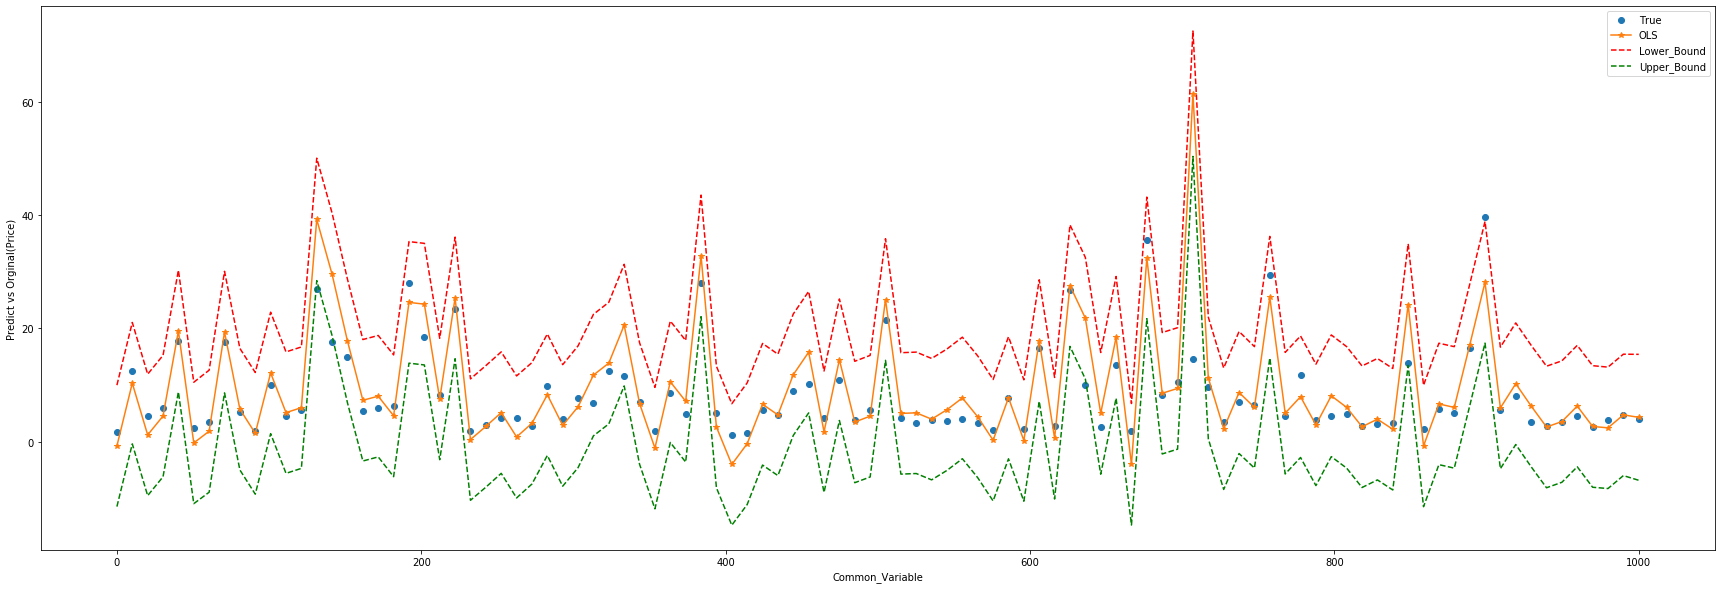

In [362]:
# Here We Can see Variation Upper bound and Lower Bound line
fig, ax = plt.subplots(figsize=(30,10 ))
ax.plot(Time, data_train_c1['Price'][:100], 'o', label="True")
ax.plot(Time, res.fittedvalues[:100], '*-', label="OLS")
ax.plot(Time, iv_u[:100], 'r--',label='Lower_Bound')
ax.plot(Time, iv_l[:100], 'g--',label='Upper_Bound')
ax.legend(loc='best')
plt.xlabel('Common_Variable')
plt.ylabel('Predict vs Orginal(Price)')

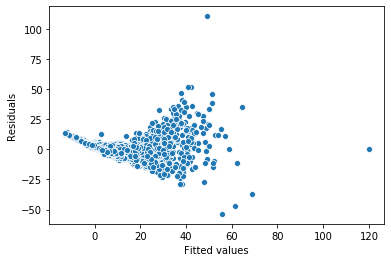

In [363]:
pp = sns.scatterplot(res.fittedvalues, res.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

In [100]:
#including Categorical Variable so we improve our best fit model but we will  get too many dummy variable coef(slope)
#Fitting Model and Generate results
model=sm.OLS.from_formula('Price~Power+C(Transmission)+Year+C(Fuel_Type)+C(Seats)',data=data_train_c1) 

res2=model.fit()
print(res2.summary())
# Note: R-squared 0.703 ,Adj R: 0.702

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     1067.
Date:                Sun, 06 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:34:44   Log-Likelihood:                -18978.
No. Observations:                5872   AIC:                         3.798e+04
Df Residuals:                    5858   BIC:                         3.808e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1934.9249 

<b> Optional (all Variable include in prediction (it does not make sense ) </b>

In [64]:
#Fitting Model and Generate results
model=sm.OLS.from_formula('Price~Power+Engine+C(Transmission)+Mileage+C(Fuel_Type)+Year+KM_Drlog_form+C(Seats)',data=data_train_c1) 
# Power ~ Engine in term of highly correlated each other so we don't need to include Engine Variable in prediction
#(Power ~ Engine r=0.87)
res3=model.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     930.0
Date:                Sun, 06 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:24:13   Log-Likelihood:                -18338.
No. Observations:                5770   AIC:                         3.671e+04
Df Residuals:                    5753   BIC:                         3.682e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4.368e+06 

<b> Car_test(CSV) Testing on this Model </b>


In [63]:
data_test=pd.read_csv('../../data/Car_test-data.csv')

In [64]:
data_test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


<b> Predict Price by given Data  </b>

In [65]:
data_train.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [8]:
# data Cleaning function
def Data_clean(data_train):

    data_train = data_train.iloc[:, 1:]

    # selection of important columns
    data_train_c = data_train.iloc[:, [0,1,2, 3, 4, 5, 7, 8, 9, 10]]

    # firstly we need to Clean the data for This Dataframe
    data_train_c.replace({' ': np.nan, 'null': np.nan}, inplace=True)
    data_train_c = data_train_c.dropna()

    # Here you can see 'null bhp' occur so it's replace by np.nan and then drop this raw
    data_train_c.replace(
        {'null bhp': np.nan, 'null km/kg': np.nan, 'null CC': np.nan}, inplace=True)
    data_train_c = data_train_c.dropna()

    # remove extenation  km/kg ,bhp, CC from below column and convert string into float Value
    l1 = ['Mileage', 'Engine', 'Power']
    for i in l1:
        data_train_c[i] = data_train_c[i].str.split(" ").apply(lambda x: x[0])
        data_train_c[i] = data_train_c[i].str.strip()
        data_train_c[i] = data_train_c[i].astype(float)

    # Fule_Type column is Categorical data so we need to convert into numeric order for Better Price prediction
    data_train_c.Fuel_Type.replace(
        {'Petrol': 1, 'CNG': 3, 'Diesel': 2, 'LPG': 4}, inplace=True)

    # Above thing apply in Transmission column
    data_train_c.Transmission.replace(
        {'Manual': 1, 'Automatic': 2}, inplace=True)

    ''' Here 'Kilometers_Driven' in High value data so we need to convert high value to lower value
    therfore we easily compare with  price value '''
    data_train_c['KM_Drlog_form'] = np.log(data_train_c['Kilometers_Driven'])

    data_train_c1 = data_train_c.copy()

    return data_train_c1

In [9]:
data_test=Data_clean(data_test)

NameError: name 'data_test' is not defined

In [7]:
data_test['Pre_Price']=res.predict(data_test) # res from the above data training function 

NameError: name 'res' is not defined

In [108]:
data_test

,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,KM_Drlog_form,Pre_Price
0,2014,40929,3,1,32.26,998.0,58.20,4.0,10.619594,1.300515
1,2013,54493,1,1,24.70,796.0,47.30,5.0,10.905828,-1.473585
2,2017,34000,2,1,13.68,2393.0,147.80,7.0,10.434116,18.754093
4,2014,29000,1,1,18.50,1197.0,82.85,5.0,10.275051,5.256332
5,2016,85609,2,1,16.00,2179.0,140.00,7.0,11.357546,16.477478
...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,2,1,20.54,1598.0,103.60,5.0,11.400999,5.511653
1230,2015,59000,1,2,17.21,1197.0,103.60,5.0,10.985293,9.611154
1231,2012,28000,2,1,23.08,1461.0,63.10,5.0,10.239960,0.037113
1232,2013,52262,1,2,17.20,1197.0,103.60,5.0,10.864025,7.561403


In [ ]:
data_train.head()

In [ ]:
sns.countplot(data_train['Fuel_Type'])


In [ ]:
sns.countplot(data_train['Transmission'])

In [ ]:
<b> Transmission affect on the seats </b>


In [ ]:
Tr_se=pd.crosstab(data_train['Seats'],data_train['Transmission'])
Tr_se

In [ ]:
Tr_se.drop(Tr_se[(Tr_se['Automatic']< 5) | (Tr_se['Manual']<5)].index,inplace=True)

In [ ]:
m=list(Tr_se.index)

In [ ]:
Tr_se

In [ ]:
chi,p,dof,expected=st.chi2_contingency(Tr_se,correction=True)

chi,p,dof,expected

In [ ]:
prob=0.95
critical=st.chi2.ppf(prob,dof)
critical

In [ ]:
expected=pd.DataFrame({'Automatic':expected[:,0],'Manual':expected[:,1]},index=m)
expected

In [5]:
#import Data
data_train=pd.read_csv('../../data/Car_train-data.csv')

In [6]:
Mulit_df=Data_clean(data_train)

NameError: name 'Data_clean' is not defined

In [4]:
Mulit_df

NameError: name 'Mulit_df' is not defined

In [12]:
Mulit_df['Company']=Mulit_df['Name'].str.split(" ").apply(lambda x: x[0])

In [13]:
Mulit_df['Price']=data_train['Price']
Multi_df=Mulit_df.dropna()

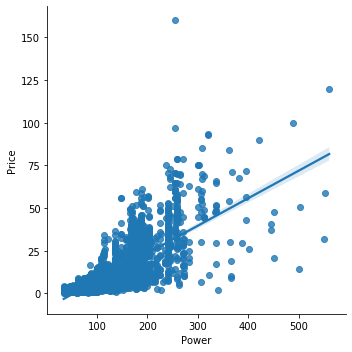

In [14]:
ax=sns.lmplot('Power','Price',Multi_df)

In [15]:
%matplotlib qt 
sns.countplot('Fuel_Type',data=Mulit_df)

In [16]:
import statsmodels.formula.api as smf

In [17]:
model=smf.ols('Price~Power+Year',data=Mulit_df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     6247.
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:38:01   Log-Likelihood:                -19195.
No. Observations:                5872   AIC:                         3.840e+04
Df Residuals:                    5869   BIC:                         3.842e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2072.1382     52.823    -39.228      0.000   -2175.690   -1968.586
Power          0.1605      0.002    104.149      0.000       0.157       0.164
Year           1.0249      0.026     39.064      0.000       0.973       1.076
==============================================================================
Omnibus:                     4119.007   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           309674.679
Skew:                           2.649   Prob(JB):                         0.00
Kurtosis:                      38.180   Cond. No.                     1.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model.rsquared

0.68038908640713

In [26]:
sns.distplot(model.resid)

In [27]:
sns.distplot(Mulit_df['Price'])

In [28]:
Mulit_df['Log_Price']=np.log(Mulit_df['Price']+1)


In [29]:
sns.distplot(Mulit_df['Log_Price'])

In [30]:
Mulit_df['Log_Power']=np.log(Mulit_df['Power']+1)

In [31]:
sns.lmplot('Log_Power','Log_Price',data=Mulit_df)

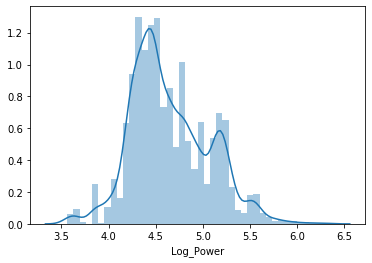

In [154]:
sns.distplot(Mulit_df['Log_Power'])

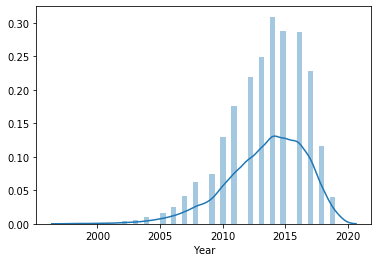

In [156]:
sns.distplot(Mulit_df['Year'])

In [195]:
Mulit_df['Log_Year']=np.log(Mulit_df['Year']+1)


In [ ]:
st.boxcox(Mulit_df['Price'])

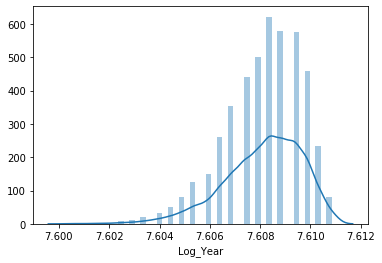

In [196]:
sns.distplot(Mulit_df['Log_Year'])

In [190]:
model=smf.ols('Log_Price~Log_Power+Log_Year',data=Mulit_df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                 1.344e+04
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:27:18   Log-Likelihood:                -1538.4
No. Observations:                5872   AIC:                             3083.
Df Residuals:                    5869   BIC:                             3103.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1536.2476     19.881    -77.272      0.000   -1575.222   -1497.273
Log_Power      1.4105      0.010    141.615      0.000       1.391       1.430
Log_Year     201.3279      2.613     77.038      0.000     196.205     206.451
==============================================================================
Omnibus:                      323.341   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1276.426
Skew:                           0.082   Prob(JB):                    6.72e-278
Kurtosis:                       5.278   Cond. No.                     4.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [170]:
Mulit_df['pre_price']=np.exp(model.predict())

In [220]:
np.var(model.predict())/np.var(Mulit_df['Log_Price'])

0.8208141622619745

In [201]:
Time= np.linspace(0, 1000, 10)


In [202]:
%matplotlib inline

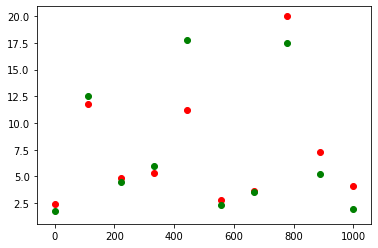

In [203]:
plt.scatter(Time,Mulit_df['pre_price'][:10],color='r')
plt.scatter(Time,Mulit_df['Price'][:10],color='g')

In [205]:
Mulit_df['pre_price'],Mulit_df['Price']

(0        2.424316
 1       11.766378
 2        4.819737
 3        5.331865
 4       11.230986
           ...    
 6014     5.054269
 6015     5.272707
 6016     7.377717
 6017     3.991496
 6018     2.643814
 Name: pre_price, Length: 5872, dtype: float64,
 0        1.75
 1       12.50
 2        4.50
 3        6.00
 4       17.74
         ...  
 6014     4.75
 6015     4.00
 6016     2.90
 6017     2.65
 6018     2.50
 Name: Price, Length: 5872, dtype: float64)

In [172]:
Mulit_df['resd']=Mulit_df['Price']-Mulit_df['pre_price']


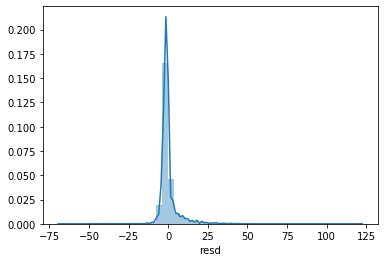

In [206]:
sns.distplot(Mulit_df['resd'])

In [103]:
model=smf.mixedlm('Price~Power+Year',Mulit_df,groups=Multi_df['Transmission']).fit()

model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:               MixedLM  Dependent Variable:  Price      
No. Observations:    5872     Method:              REML       
No. Groups:          2        Scale:               39.5298    
Min. group size:     1702     Log-Likelihood:      -19138.6956
Max. group size:     4170     Converged:           Yes        
Mean group size:     2936.0                                   
--------------------------------------------------------------
            Coef.   Std.Err.    z    P>|z|   [0.025    0.975] 
--------------------------------------------------------------
Intercept -2008.699   52.512 -38.252 0.000 -2111.622 -1905.777
Power         0.145    0.002  72.768 0.000     0.141     0.149
Year          0.995    0.026  38.159 0.000     0.943     1.046
Group Var     3.917    0.890                                  
==============================================================

"""

In [116]:
model.random_effects

{1: Group   -1.392416
 dtype: float64,
 2: Group    1.392416
 dtype: float64}

In [104]:
model.resid

0       4.425132
1       0.310466
2       1.740508
3       2.237277
4       2.632000
          ...   
6014    1.144172
6015   -0.164175
6016   -4.241516
6017    1.041850
6018    4.262041
Length: 5872, dtype: float64

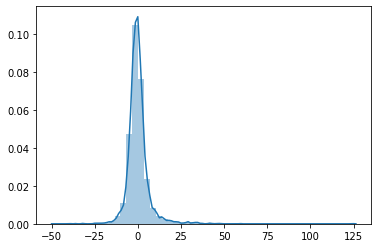

In [105]:
sns.distplot(model.resid)

In [106]:
Time= np.linspace(0, 1000, 100)

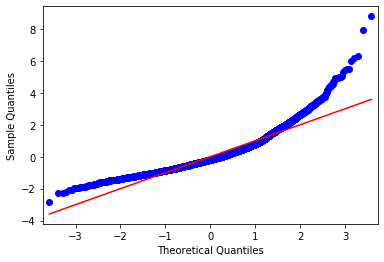

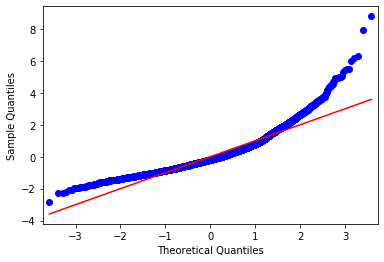

In [207]:
sm.qqplot(np.exp(model.resid),fit=True,line='s')

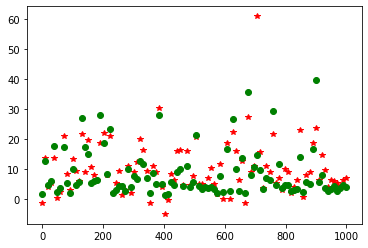

In [108]:
plt.plot(Time,model.predict()[:100],'*',color='r')
plt.plot(Time,Mulit_df['Price'][:100],'o',color='g',)



In [109]:
model.reml

True

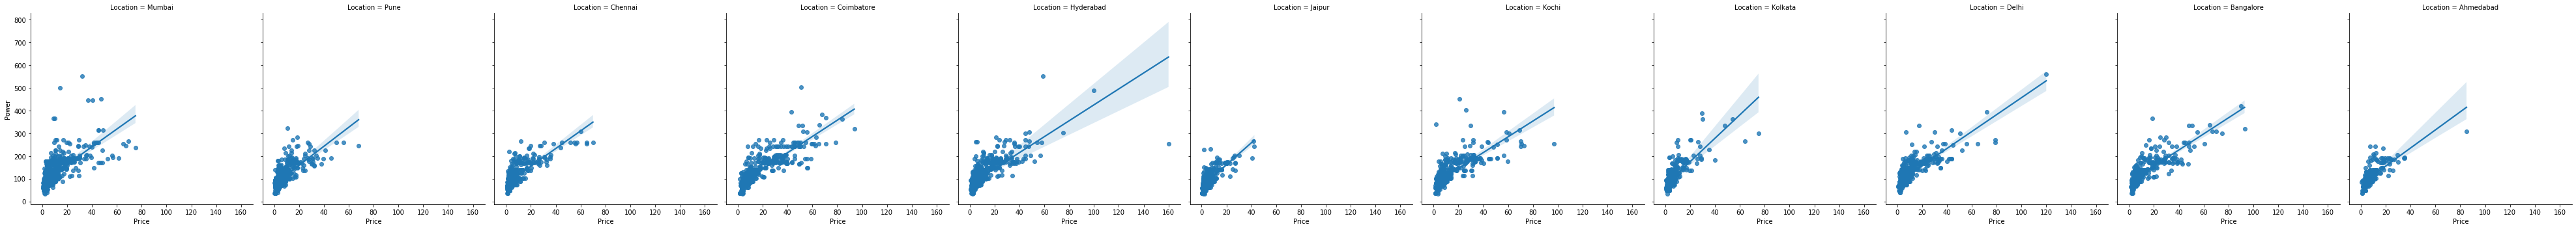

In [110]:
sns.lmplot('Price','Power',col='Location',data=Mulit_df)

In [112]:
vayi=np.var(Mulit_df['Price'])

In [113]:
vayh=np.var(model.predict())

In [114]:
vayh/vayi

0.5688533166019165

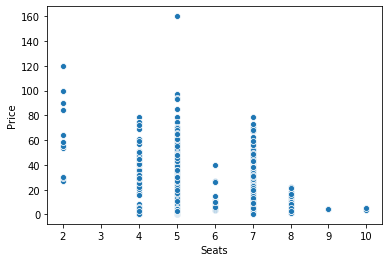

In [143]:
sns.scatterplot(Mulit_df['Seats'],Mulit_df['Price'])

In [142]:
An_T=pd.crosstab(Mulit_df['Price'],Multi_df['Seats']).var().to_frame()
An_T

,0
Seats,
2.0,0.010914
4.0,0.101111
5.0,60.778860
6.0,0.022292
7.0,1.385860
8.0,0.167301
9.0,0.002196
10.0,0.002926


group1,group2,meandiff,p-adj,lower,upper,reject
2.0,4.0,-40.5852,0.001,-50.1558,-31.0146,True
2.0,5.0,-52.751,0.001,-61.7609,-43.7411,True
2.0,6.0,-51.4701,0.001,-62.2987,-40.6415,True
2.0,7.0,-46.4721,0.001,-55.5567,-37.3874,True
2.0,8.0,-53.8393,0.001,-63.2668,-44.4117,True
2.0,9.0,-56.8877,0.001,-77.6678,-36.1076,True
2.0,10.0,-56.8627,0.001,-75.4126,-38.3128,True
4.0,5.0,-12.1658,0.001,-15.4591,-8.8726,True
4.0,6.0,-10.8849,0.001,-17.7352,-4.0347,True
4.0,7.0,-5.8869,0.001,-9.3795,-2.3943,True


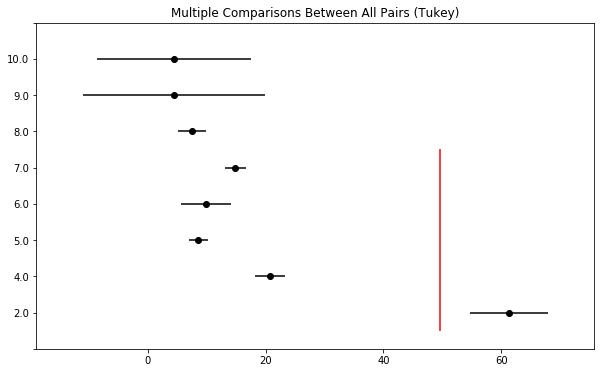

In [132]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=Mulit_df['Price'],     # Data
                          groups=Mulit_df['Seats'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary() 

In [120]:
data = sm.datasets.get_rdataset("dietox", "geepack").data
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.394    2.149                            



In [121]:
vayi=np.var(data['Weight'])

In [122]:
vayh=np.var(mdf.predict())

In [123]:
vayh/vayi

0.9166386703810541

In [124]:
data

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
0,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1
1,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
2,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
3,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
4,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5
...,...,...,...,...,...,...,...,...
856,8442,Evit000,Cu175,24,25.7,73.19995,83.800003,8
857,8442,Evit000,Cu175,24,25.7,81.69995,99.800003,9
858,8442,Evit000,Cu175,24,25.7,90.29999,115.200001,10
859,8442,Evit000,Cu175,24,25.7,96.00000,133.200001,11
